In [1]:
# Kumaaragurubaran M - RA2311043010057 - 2nd year
# Task 2 - Customer Segmentation with Kaggle Titanic

In [10]:
!pip install opendatasets
!pip install pandas

In [3]:
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/mmek31/titantic")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kumaaragurubaranm
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mmek31/titantic


100%|██████████| 22.0k/22.0k [00:00<00:00, 16.5MB/s]

In [4]:
import pandas as pd
data = pd.read_csv("/content/titantic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  Pclass PassengerId  Survived       Fare                 Age
               count      mean       mean   median       mean
0      1         216  0.629630  84.154687  60.2875  38.233441
1      2         184  0.472826  20.662183  14.2500  29.877630
2      3         491  0.242363  13.675550   8.0500  25.140620
      Sex Pclass PassengerId  Survived        Fare                  Age
                       count      mean        mean    median       mean
0  female      1          94  0.968085  106.125798  82.66455  34.611765
1  female      2          76  0.921053   21.970121  22.00000  28.722973
2  female      3         144  0.500000   16.118810  12.47500  21.750000
3    male      1         122  0.368852   67.226127  41.26250  41.281386
4    male      2         108  0.157407   19.741782  13.00000  30.740707
5    male      3         347  0.135447   12.661633   7.92500  26.507589
    AgeGroup Pclass PassengerId  Survived        Fare          
                          count      mean        m

<ipython-input-9-da0beebc7867>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_group = data.groupby(['AgeGroup', 'Pclass']).agg({
<ipython-input-9-da0beebc7867>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_class_group = data.groupby(['FareGroup', 'Pclass']).agg({


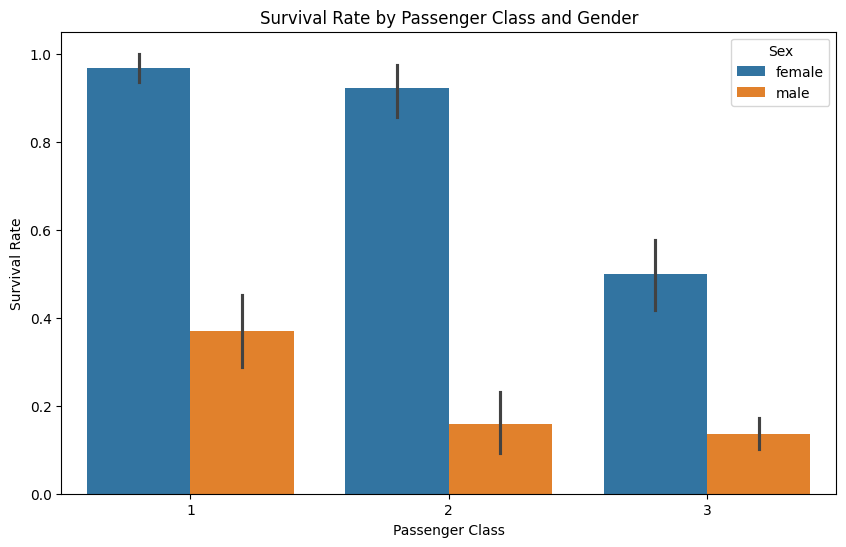

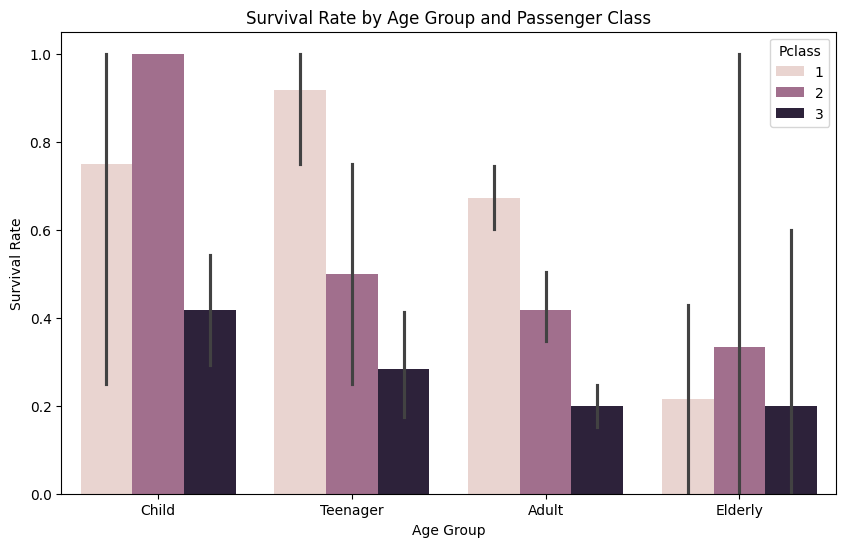

In [9]:
class_group = data.groupby('Pclass').agg({
    'PassengerId': 'count',
    'Survived': 'mean',
    'Fare': ['mean', 'median'],
    'Age': 'mean'
}).reset_index()
print(class_group)
gender_class_group = data.groupby(['Sex', 'Pclass']).agg({
    'PassengerId': 'count',
    'Survived': 'mean',
    'Fare': ['mean', 'median'],
    'Age': 'mean'
}).reset_index()
print(gender_class_group)
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Elderly'])
age_class_group = data.groupby(['AgeGroup', 'Pclass']).agg({
    'PassengerId': 'count',
    'Survived': 'mean',
    'Fare': ['mean', 'median']
}).reset_index()
print(age_class_group)
data['FareGroup'] = pd.qcut(data['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
fare_class_group = data.groupby(['FareGroup', 'Pclass']).agg({
    'PassengerId': 'count',
    'Survived': 'mean',
    'Age': 'mean'
}).reset_index()
print(fare_class_group)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=data)
plt.title('Survival Rate by Age Group and Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()